# Univariate Linear Regression 

In [110]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [111]:
# Create the data as a dictionary
data = {
    "Height (inches)": [60, 62, 65, 67, 70, 72],
    "Weight (pounds)": [115, 120, 130, 140, 150, 160]
}

In [112]:
data = pd.DataFrame(data)

In [113]:
data

,Height (inches),Weight (pounds)
0,60,115
1,62,120
2,65,130
3,67,140
4,70,150
5,72,160


In [114]:
X = data[["Height (inches)"]]
y = data["Weight (pounds)"]

In [115]:
y.shape

(6,)

In [116]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [117]:
slope = model.coef_[0]
intercept = model.intercept_
slope, intercept

(3.773584905660376, -113.22327044025147)

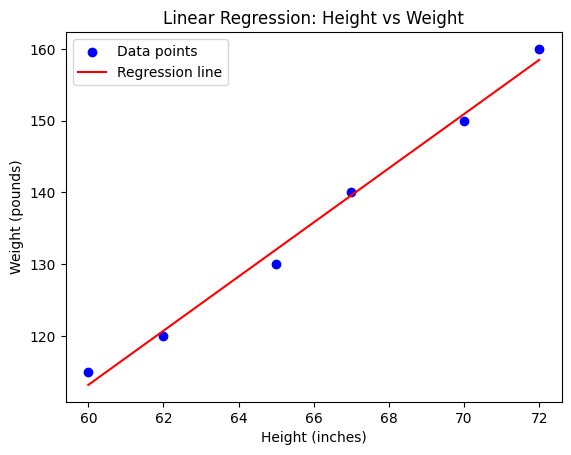

In [118]:
# Step 5: Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Linear Regression: Height vs Weight")
plt.legend()
#plt.grid(True)
plt.show()

In [119]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm

In [120]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [121]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

## Boston Housing Dataset 

## Step 1: Loading data 

In [122]:
# Load the Boston dataset
boston_data = load_data("Boston")
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [123]:
X = boston_data.drop(columns=["medv"])
y = boston_data["medv"]

In [124]:
X.shape, y.shape

((506, 12), (506,))

## Step 2: Scalling the Data 

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)  # scaled version of your X

In [126]:
X = pd.DataFrame(X, columns=boston_data.columns[:-1])
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302


## Step 3: Splitting Data into training and testing sets 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

# linear regression using gradient descent

In [131]:
class LR_model:
    def __init__(self):
        self.parameters = {}
        self.loss = [] 
        
    # prediction steps | this is the forward pass input_data == X 
    def forward(self, X):
        m = self.parameters['m']
        c = self.parameters['c']
        #predictions = m * X + c 
        return np.dot(X, m) + c  # using dot product for multiple features
    
    
    # calculating the MSE loss
    def cost(self, predictions, y):
        return np.mean((y - predictions )**2)
    
    def backward_propagation(self,X, y, predictions):
        m = -2 * np.dot(X.T,(y - predictions)) / len(y)
        c = -2 * np.mean(y - predictions)
        return {'dm': m, 'dc': c}
    
        # derivative = {}
        # df  = (predictions - y).mean()
        # derivative['dm'] =  2 * (X * df).mean()
        # derivative['dc'] =  2 * df.mean()
        # return derivative
    
    # updating the parameters | specifiying the hyperparameters 
    def update_parameters(self, derivative, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivative['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivative['dc']
        
     # training the model    
    def train (self, X, y, learning_rate, iterations): 
        # initializing the parameters
        n_features = X.shape[1]
        self.parameters['m'] = np.random.uniform(-1,1, size=n_features)  # random initialization for multiple features
        self.parameters['c'] = np.random.uniform(-1,1) # random initialization for intercept
        self.loss = [] 
        
        for i in range(iterations):
            predictions = self.forward(X)
            cost = self.cost(predictions, y)
            derivative = self.backward_propagation(X, y , predictions)
            self.update_parameters(derivative, learning_rate)
            self.loss.append(cost)
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {cost:.4f}")
        return self.parameters, self.loss

## Step 4: Train the Model 

In [132]:
model = LR_model()

In [143]:
model.train(X_train, y_train, learning_rate=0.01, iterations=300)

Iteration 0: Loss = 599.0310
Iteration 100: Loss = 33.1595
Iteration 200: Loss = 23.5084


({'m': array([-0.90349365,  0.36923933, -0.22301797,  0.81773326, -1.26689156,
          3.26892339, -0.10588193, -2.28296795,  0.99206014, -1.0112246 ,
         -1.76212921, -3.69493526]),
  'c': 22.392717274528795},
 [599.0309811829737,
  568.7326596760599,
  541.1820051702557,
  515.9366095999294,
  492.6446290717414,
  471.0251304986386,
  450.85275500630877,
  431.9457476150157,
  414.1566120945748,
  397.36481315018403,
  381.47107538679114,
  366.3929277449491,
  352.0612194807369,
  338.4173940939657,
  325.411354648682,
  312.9997906064983,
  301.1448648898281,
  289.81318218889305,
  278.9749769114076,
  268.60347272928544,
  258.6743762463003,
  249.16547555220268,
  240.05632085524252,
  231.3279693962642,
  222.96278075531356,
  214.9442517091101,
  207.25688217432926,
  199.88606562517938,
  192.81799881945904,
  186.03960679498107,
  179.5384799779836,
  173.30282093152707,
  167.32139880747948,
  161.58350998371805,
  156.07894369450523,
  150.79795171682002,
  145.7312

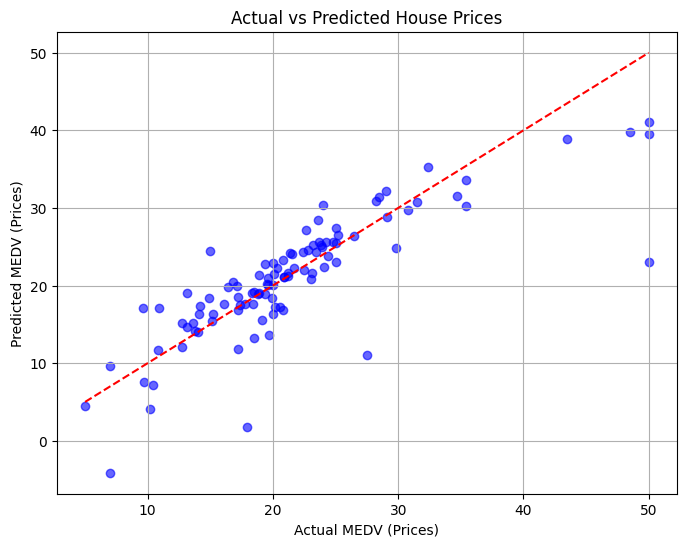

In [144]:
import matplotlib.pyplot as plt

y_pred = model.forward(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual MEDV (Prices)")
plt.ylabel("Predicted MEDV (Prices)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [145]:
model.parameters

{'m': array([-0.90349365,  0.36923933, -0.22301797,  0.81773326, -1.26689156,
         3.26892339, -0.10588193, -2.28296795,  0.99206014, -1.0112246 ,
        -1.76212921, -3.69493526]),
 'c': 22.392717274528795}

### https://github.com/atomikkus/linear_regression